# Kann man Teile anhand ihrer Masse klassifizieren?

In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt


In [3]:
min_id = 5
max_id = 100

all_weights = []
quantities = []

for i in range(min_id, max_id):
  url = f'http://www.bricklink.com/v2/catalog/catalogitem.page?P={i}#T=C'
  html = requests.get(url, headers={'user-agent': 'Mozilla/5.0 (Macintosh; Intel) Gecko/20100101 Firefox/59.0'})
  soup = BeautifulSoup(html.text, 'html.parser')
  weight = soup.find(id='item-weight-info')
  if weight:
    print(weight.string)
    try:
      number = float(weight.string[:-1])
      if not number in all_weights:
        all_weights.append(number)
        quantities.append(1)
      else:
        quantities[all_weights.index(number)]+=1
    except ValueError:
      pass

2g
1g
74g
0.95g
1g
0.87g
2.14g
0.49g
0.49g
0.9g
3g
6g
0.3g
0.25g
0.5g
0.28g
0.4g
0.35g
?
Is ?
?
Is ?
0.34g
0.1g


In [6]:
len(quantities)

18

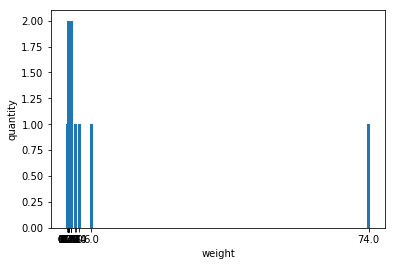

In [7]:
plt.bar(all_weights, quantities, tick_label=all_weights)
plt.ylabel('quantity')
plt.xlabel('weight')
plt.show()

Von den 19 Teilen die eine definierte Masse hatten, haben schon 2 die exakt gleiche Masse, das heißt, dass es kaum möglich ist die Teile anhand der Masse zu unterscheiden.